# Libraries use

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Import dataset

In [2]:
NASDAQ = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/NASDAQ.CSV')
NIFTY_50 = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/NIFTY 50.CSV')
Nikkei_225 = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/Nikkei 225.CSV')
Hang_Seng = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/HANG SENG.CSV')
es_train = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/ESCORTS.NS.CSV')
INFY = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/INFY.CSV')
ACN = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/ACN.csv')
CTSH = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/CTSH.csv')
ORCL = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/ORCL.csv')

In [3]:
# d= np.arange(21,30)

In [4]:
# from scipy import stats
# # df = es_train.iloc[:,1:]
# z_scores = stats.zscore(d)
# z_scores

In [5]:
# print(stats.zscore(d))

# Preprocessing

In [6]:
print('NASDAQ',NASDAQ.isna().sum(),'\n\n\n','NIFTY_50',NIFTY_50.isna().sum(),'\n\n\n','es_train',es_train.isna().sum(),'\n\n\n',"Nikkei_225",Nikkei_225.isna().sum(),"\n\n\n","Hang_Seng",Hang_Seng.isna().sum())

NASDAQ Date        0
Open        1
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 NIFTY_50 Date         0
Open        24
High        23
Low         23
Close       23
AdjClose    23
Volume      23
dtype: int64 


 es_train Date        0
Open        8
High        7
Low         7
Close       7
AdjClose    7
Volume      7
dtype: int64 


 Nikkei_225 Date         0
Open        21
High        20
Low         20
Close       20
AdjClose    20
Volume      20
dtype: int64 


 Hang_Seng Date         0
Open        12
High        11
Low         11
Close       11
AdjClose    11
Volume      11
dtype: int64


In [7]:
INFY.isna().sum()

Date        0
Open        1
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [8]:
ORCL.isna().sum()

Date        0
Open        1
AdjClose    0
dtype: int64

In [9]:
ACN.isna().sum()

Date        0
Open        1
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [10]:
CTSH.isna().sum()

Date        0
Open        1
AdjClose    0
dtype: int64

In [11]:
#check rows contain null values

INFY[INFY['Open'].isna()]
CTSH[CTSH['Open'].isna()]
ACN[ACN['Open'].isna()]
ORCL[ORCL['Open'].isna()]
Hang_Seng[Hang_Seng['Open'].isnull()]
Nikkei_225[Nikkei_225['Open'].isnull()]
es_train[es_train['Open'].isna()]
NIFTY_50[NIFTY_50['Open'].isna()]

,Date,Open,High,Low,Close,AdjClose,Volume
264,30-05-2011,NaN,5509.299805,5458.600098,5473.100098,5473.100098,0.0
383,23-11-2011,NaN,4779.500000,4640.950195,4706.450195,4706.450195,0.0
404,23-12-2011,NaN,4763.450195,4693.200195,4714.000000,4714.000000,0.0
409,30-12-2011,NaN,4690.450195,4608.899902,4624.299805,4624.299805,0.0
414,06-01-2012,NaN,4794.899902,4686.850098,4754.100098,4754.100098,0.0
453,02-03-2012,NaN,5392.549805,5315.049805,5359.350098,5359.350098,0.0
505,18-05-2012,NaN,4908.500000,4788.950195,4891.450195,4891.450195,0.0
574,27-08-2012,NaN,5399.149902,5346.649902,5350.250000,5350.250000,0.0
583,07-09-2012,NaN,5347.149902,5309.200195,5342.100098,5342.100098,0.0
625,09-11-2012,NaN,5751.700195,5677.750000,5686.250000,5686.250000,0.0


In [12]:
# drop null values because these values has no use

Hang_Seng.dropna(axis=0,inplace=True)
Nikkei_225.dropna(axis=0,inplace=True)
es_train.dropna(axis=0,inplace=True)
NIFTY_50.dropna(axis=0,inplace=True)
NASDAQ.dropna(axis=0,inplace=True)
INFY.dropna(axis=0,inplace=True)
ACN.dropna(axis=0,inplace=True)
CTSH.dropna(axis=0,inplace=True)
ORCL.dropna(axis=0,inplace=True)

In [13]:
# Print samples to check weather null values is removed or not
print('NASDAQ',NASDAQ.isna().sum(),'\n\n\n','NIFTY_50',NIFTY_50.isna().sum(),'\n\n\n','es_train',es_train.isna().sum(),'\n\n\n',"Nikkei_225",Nikkei_225.isna().sum(),"\n\n\n","Hang_Seng",Hang_Seng.isna().sum())

NASDAQ Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 NIFTY_50 Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 es_train Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 Nikkei_225 Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 Hang_Seng Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64


# Analysis of data and find out important factors

Text(0.5, 1.0, 'Closing price')

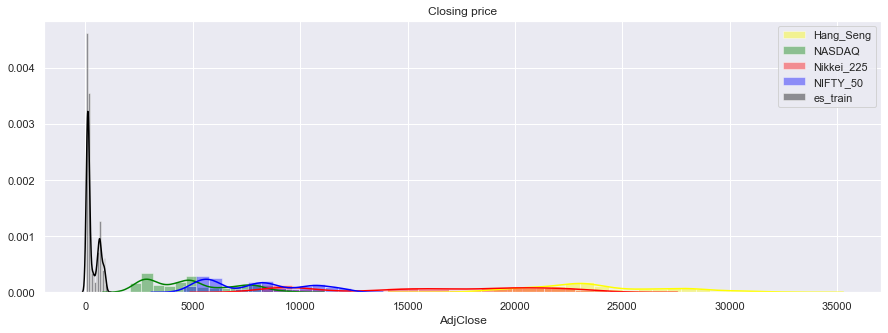

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="darkgrid")

sns.distplot(Hang_Seng.AdjClose,color='yellow',label='Hang_Seng')
sns.distplot(NASDAQ.AdjClose,color='green',label='NASDAQ')
sns.distplot(Nikkei_225.AdjClose,color='red',label='Nikkei_225')
sns.distplot(NIFTY_50.AdjClose,color='blue',label='NIFTY_50')
sns.distplot(es_train.AdjClose,color='black',label='es_train')
plt.legend(loc='upper right')
plt.title('Closing price')

Text(0.5, 1.0, 'Open price')

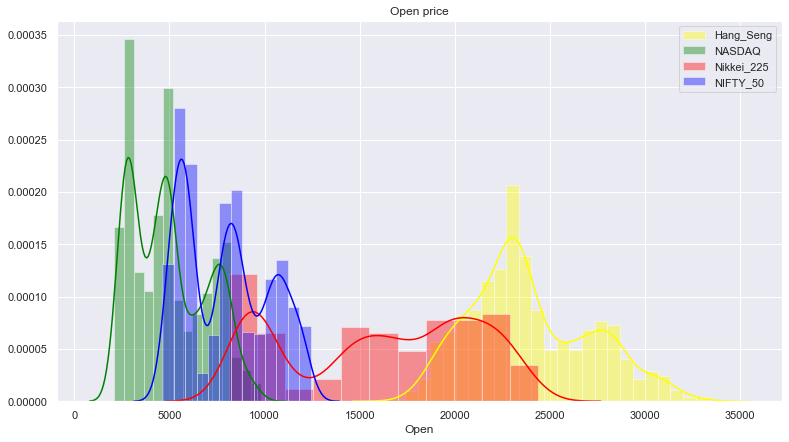

In [15]:
sns.set(rc={'figure.figsize':(13,7)})
sns.set(style="darkgrid")

sns.distplot(Hang_Seng.Open,color='yellow',label='Hang_Seng')
sns.distplot(NASDAQ.Open,color='green',label='NASDAQ')
sns.distplot(Nikkei_225.Open,color='red',label='Nikkei_225')
sns.distplot(NIFTY_50.Open,color='blue',label='NIFTY_50')
plt.legend(loc='upper right')
plt.title('Open price')

Text(0.5, 1.0, 'Regression plot')

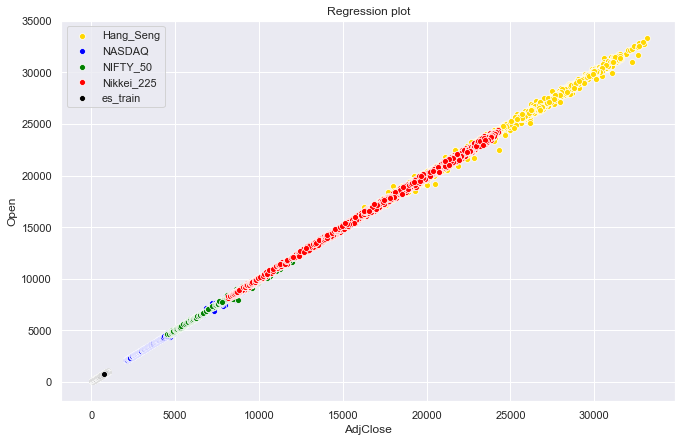

In [16]:
sns.set(rc={'figure.figsize':(11,7)})
sns.scatterplot(Hang_Seng.AdjClose,Hang_Seng.Open,color='gold',label='Hang_Seng')
sns.scatterplot(NASDAQ.AdjClose,NASDAQ.Open,color='blue',label='NASDAQ')
sns.scatterplot(NIFTY_50.AdjClose,NIFTY_50.Open,color='green',label='NIFTY_50')
sns.scatterplot(Nikkei_225.AdjClose,Nikkei_225.Open,color='red',label='Nikkei_225')
sns.scatterplot(es_train.AdjClose,es_train.Open,color='black',label='es_train')
plt.legend(loc='upper left')
plt.title('Regression plot')

Text(0.5, 1.0, 'Regression plot')

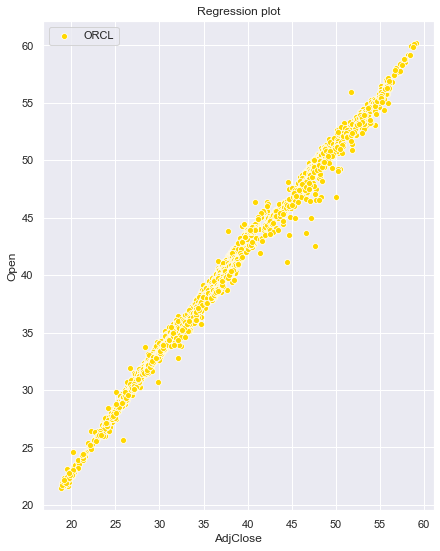

In [17]:
sns.set(rc={'figure.figsize':(7,9)})
sns.scatterplot(ORCL.AdjClose,ORCL.Open,color='gold',label='ORCL')
plt.legend(loc='upper left')
plt.title('Regression plot')

## as we can see in box plot their is no any outliers present in all dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


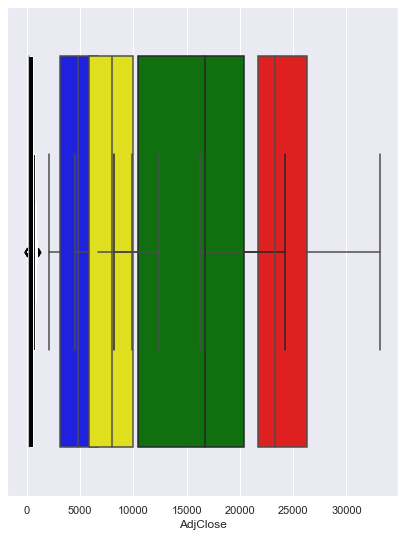

In [18]:
#checking outliers

sns.boxplot(Hang_Seng.AdjClose,color='red')
sns.boxplot(Nikkei_225.AdjClose,color='green')
sns.boxplot(NASDAQ.AdjClose,color='blue')
sns.boxplot(NIFTY_50.AdjClose,color='yellow')
sns.boxenplot(es_train.AdjClose,color='black')

In [19]:
# rename columns for better understand and can be differentiate all values

Hang_Seng=Hang_Seng.rename(columns={'AdjClose': 'Hang_Seng_AdjClose'})
Hang_Seng=Hang_Seng.rename(columns={'Open': 'Hang_Seng_Open'})
NASDAQ=NASDAQ.rename(columns={'AdjClose': 'NASDAQ_AdjClose'})
NASDAQ=NASDAQ.rename(columns={'Open': 'NASDAQ_Open'})
Nikkei_225=Nikkei_225.rename(columns={'AdjClose': 'Nikkei_225_AdjClose'})
Nikkei_225=Nikkei_225.rename(columns={'Open': 'Nikkei_225_Open'})
NIFTY_50=NIFTY_50.rename(columns={'AdjClose': 'NIFTY_50_AdjClose'})
NIFTY_50=NIFTY_50.rename(columns={'Open': 'NIFTY_50_Open'})
es_train=es_train.rename(columns={'AdjClose': 'es_train_AdjClose'})
es_train=es_train.rename(columns={'Open': 'es_train_Open'})
INFY=INFY.rename(columns={'AdjClose': 'INFY_AdjClose'})
INFY=INFY.rename(columns={'Open': 'INFY_Open'})
ACN=ACN.rename(columns={'AdjClose': 'ACN_AdjClose'})
ACN=ACN.rename(columns={'Open': 'ACN_Open'})
CTSH = CTSH.rename(columns={'AdjClose': 'CTSH_AdjClose'})
CTSH = CTSH.rename(columns={'Open': 'CTSH_Open'})
ORCL = ORCL.rename(columns={'AdjClose': 'ORCL_AdjClose'})
ORCL = ORCL.rename(columns={'Open': 'ORCL_Open'})

## *** splitting data into important features  ***

## ESCORTS

In [20]:
df1 = Hang_Seng[['Date','Hang_Seng_AdjClose','Hang_Seng_Open']]
df2 = NASDAQ[['Date','NASDAQ_AdjClose']]
df3 = Nikkei_225[['Date','Nikkei_225_AdjClose','Nikkei_225_Open']]
df4 = NIFTY_50[['Date','NIFTY_50_AdjClose','NIFTY_50_Open']]
escorts = es_train[['Date','es_train_AdjClose','es_train_Open']]

## INFY

In [21]:
infy = INFY[['Date','INFY_AdjClose','INFY_Open']]

## ACN

In [22]:
ACN = ACN[['Date','ACN_AdjClose','ACN_Open']]

## ORCL

In [23]:
ORCL = ORCL[['Date','ORCL_AdjClose','ORCL_Open']]

## CTSH

In [24]:
CTSH = CTSH[['Date','CTSH_AdjClose','CTSH_Open']]

In [25]:
# create sample data

escopy = escorts[['Date','es_train_AdjClose']]
escopy = pd.DataFrame(escopy)

# *** Merging data ***

In [26]:
#ESCORTS

tb1 = pd.merge(df1,df2,how='inner',on='Date')
tb1 = pd.merge(tb1,df3,how='inner',on='Date')
tb1 = pd.merge(tb1,df4,how='inner',on='Date')
escorts_df = pd.merge(tb1,escorts,how='inner',on='Date')

#INFY

tb4 = pd.merge(df1,df2,how='inner',on='Date')
tb4 = pd.merge(tb4,df3,how='inner',on='Date')
tb4 = pd.merge(tb4,df4,how='inner',on='Date')
tb4 = pd.merge(tb4,escopy,how='inner',on='Date')
INFY_df = pd.merge(tb4,infy,how='inner',on='Date')

#ACN

tb9 = pd.merge(df1,df2,how='inner',on='Date')
tb9 = pd.merge(tb9,df3,how='inner',on='Date')
tb9 = pd.merge(tb9,df4,how='inner',on='Date')
tb9 = pd.merge(tb9,escopy,how='inner',on='Date')
ACN = pd.merge(tb9,ACN,how='inner',on='Date')

#CTSH

tb10 = pd.merge(df1,df2,how='inner',on='Date')
tb10 = pd.merge(tb10,df3,how='inner',on='Date')
tb10 = pd.merge(tb10,df4,how='inner',on='Date')
tb10 = pd.merge(tb10,escopy,how='inner',on='Date')
CTSH = pd.merge(tb10,CTSH,how='inner',on='Date')

#ORCL

tb12 = pd.merge(df1,df2,how='inner',on='Date')
tb12 = pd.merge(tb12,df3,how='inner',on='Date')
tb12 = pd.merge(tb12,df4,how='inner',on='Date')
tb12 = pd.merge(tb12,escopy,how='inner',on='Date')
ORCL = pd.merge(tb12,ORCL,how='inner',on='Date')

In [27]:
# ORCL.head()

In [28]:
escorts_df=escorts_df.drop(['Date'],axis=1)
INFY_df=INFY_df.drop(['Date'],axis=1)
ACN=ACN.drop(['Date'],axis=1)
CTSH = CTSH.drop(['Date'],axis=1)
ORCL = ORCL.drop(['Date'],axis=1)

In [29]:
ORCL

,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,es_train_AdjClose,ORCL_AdjClose,ORCL_Open
0,20212.49023,20411.55078,2425.020020,10394.03027,10542.76953,5156.649902,5157.549805,175.531219,21.561913,24.420000
1,20422.46094,20258.44922,2394.360107,10620.54981,10453.40039,5178.899902,5180.549805,178.270325,21.246368,24.100000
2,20145.42969,19832.02930,2346.850098,10462.50977,10329.37012,5093.500000,5093.899902,173.294266,20.843178,23.889999
3,19715.19922,19768.80078,2354.229980,10235.75977,10313.13965,5059.899902,5059.549805,173.431229,20.808119,23.799999
4,19944.93945,19552.16016,2317.260010,10242.63965,10087.33008,5066.200195,5065.100098,167.953003,20.536404,23.219999
...,...,...,...,...,...,...,...,...,...,...
2094,23977.32031,23844.55078,8494.750000,19429.43945,19331.85938,9313.900391,9163.900391,752.200012,51.970001,52.410000
2095,23831.33008,24030.66016,8634.519531,19262.00000,19410.83984,9154.400391,9259.700195,717.000000,53.009998,53.360001
2096,24280.14063,24401.11914,8730.160156,19783.22070,19776.17969,9282.299805,9389.799805,709.099976,53.369999,53.900002
2097,24575.96094,24786.01953,8607.730469,19771.18945,20105.67969,9380.900391,9408.599609,709.150024,53.200001,53.950001


In [30]:
# CORRELATION

# escorts_df.corr().style.background_gradient(cmap="Reds")
# INFY_df.corr().style.background_gradient(cmap="Reds")
# ACN.corr().style.background_gradient(cmap="Reds")
CTSH.corr().style.background_gradient(cmap="Reds")
# ORCL.corr().style.background_gradient(cmap="Reds")

,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,es_train_AdjClose,CTSH_AdjClose,CTSH_Open
Hang_Seng_AdjClose,1,0.998131,0.78988,0.792983,0.792684,0.828906,0.828294,0.816526,0.792845,0.785052
Hang_Seng_Open,0.998131,1,0.788947,0.792134,0.792861,0.827732,0.827904,0.815238,0.793237,0.785977
NASDAQ_AdjClose,0.78988,0.788947,1,0.933506,0.933538,0.969755,0.969745,0.873364,0.881439,0.865821
Nikkei_225_AdjClose,0.792983,0.792134,0.933506,1,0.999652,0.938133,0.938037,0.777464,0.936942,0.931432
Nikkei_225_Open,0.792684,0.792861,0.933538,0.999652,1,0.938025,0.938168,0.777208,0.937343,0.931949
NIFTY_50_AdjClose,0.828906,0.827732,0.969755,0.938133,0.938025,1,0.999749,0.867669,0.902261,0.889848
NIFTY_50_Open,0.828294,0.827904,0.969745,0.938037,0.938168,0.999749,1,0.867346,0.902418,0.890198
es_train_AdjClose,0.816526,0.815238,0.873364,0.777464,0.777208,0.867669,0.867346,1,0.794969,0.780966
CTSH_AdjClose,0.792845,0.793237,0.881439,0.936942,0.937343,0.902261,0.902418,0.794969,1,0.998648
CTSH_Open,0.785052,0.785977,0.865821,0.931432,0.931949,0.889848,0.890198,0.780966,0.998648,1


In [31]:
# now check outliers using z_score
from scipy import stats
z_scores = stats.zscore(INFY_df)
# z_scores

In [32]:
print(np.where(np.abs(z_scores) > 3))

(array([], dtype=int64), array([], dtype=int64))


In [33]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
INFY_df = INFY_df[filtered_entries]

## *** Splitting columns *** 

In [34]:
# RELIANCE_df-63, Escorts-9, INFY- 0.03, WIPRO - 27,techm - 54,hcl-74 , ACN-2.4 ,CTSH=0.36, MINDTREE = 110,ORCL = 0.34

In [35]:
X = INFY_df[INFY_df.columns[:-1]]
Y = INFY_df[INFY_df.columns[-1]]

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size=0.25, random_state=3)

## Test semple data

In [36]:
data1 = pd.read_csv(r'C:\Users\Shourya\Desktop\dataset\ESCORTS dataset\dataset\HANG SENG_test.csv')
data2 = pd.read_csv(r'C:\Users\Shourya\Desktop\dataset\ESCORTS dataset\dataset\NIFTY 50_test.csv')
data3 = pd.read_csv(r'C:\Users\Shourya\Desktop\dataset\ESCORTS dataset\dataset\NASDAQ_test.csv')
data4 = pd.read_csv(r'C:\Users\Shourya\Desktop\dataset\ESCORTS dataset\dataset\Nikkei 225_test.csv')
data5 = pd.read_csv(r'C:\Users\Shourya\Desktop\dataset\ESCORTS dataset\dataset\ESCORTS.NS_test.csv')
data6 = pd.read_csv(r'C:\Users\Shourya\Desktop\dataset\ESCORTS dataset\dataset\ORCL_test.csv')

data1.dropna(axis=0,inplace=True)
data4.dropna(axis=0,inplace=True)
data5.dropna(axis=0,inplace=True)
data2.dropna(axis=0,inplace=True)
data3.dropna(axis=0,inplace=True)
data6.dropna(axis=0,inplace=True)

In [37]:
data1=data1.rename(columns={'AdjClose': 'Hang_Seng_AdjClose'})
data1=data1.rename(columns={'Open': 'Hang_Seng_Open'})
data3=data3.rename(columns={'AdjClose': 'NASDAQ_AdjClose'})
data3=data3.rename(columns={'Open': 'NASDAQ_Open'})
data4=data4.rename(columns={'AdjClose': 'Nikkei_225_AdjClose'})
data4=data4.rename(columns={'Open': 'Nikkei_225_Open'})
data2=data2.rename(columns={'AdjClose': 'NIFTY_50_AdjClose'})
data2=data2.rename(columns={'Open': 'NIFTY_50_Open'})
data5=data5.rename(columns={'AdjClose': 'es_train_AdjClose'})
data5=data5.rename(columns={'Open': 'es_train_Open'})
data6 = data6.rename(columns={'AdjClose': 'ORCL_AdjClose'})
data6 = data6.rename(columns={'Open': 'ORCL_Open'})

In [38]:
# # # splitting data
data1 = data1[['Date','Hang_Seng_AdjClose','Hang_Seng_Open']]
data3 = data3[['Date','NASDAQ_AdjClose']]
data4 = data4[['Date','Nikkei_225_AdjClose','Nikkei_225_Open']]
data2 = data2[['Date','NIFTY_50_AdjClose','NIFTY_50_Open']]
data5 = data5[['Date','es_train_AdjClose']]
data6 = data6[['Date','ORCL_AdjClose','ORCL_Open']]

In [39]:
tb2 = pd.merge(data1,data3,how='inner',on='Date')
tb2 = pd.merge(tb2,data4,how='inner',on='Date')
tb2 = pd.merge(tb2,data2,how='inner',on='Date')
tb2 = pd.merge(tb2,data5,how='inner',on='Date')
tb2 = pd.merge(tb2,data6,how='inner',on='Date')

In [40]:
# tb2.to_csv('tested_data.csv')

In [41]:
X_test = tb2[tb2.columns[1:-1]]
Y_test = tb2[tb2.columns[-1]]

In [42]:
X_test = X_test.tail()
Y_test = Y_test.tail()

In [43]:
X_test

,Hang_Seng_AdjClose,Hang_Seng_Open,NASDAQ_AdjClose,Nikkei_225_AdjClose,Nikkei_225_Open,NIFTY_50_AdjClose,NIFTY_50_Open,es_train_AdjClose,ORCL_AdjClose
27,23732.51953,23792.24023,9552.049805,22062.39063,22175.51953,9826.150391,9880.849609,972.400024,53.060001
28,23995.93945,24303.56055,9608.379883,22325.60938,22649.00977,9979.099609,10108.299810,959.650024,53.279999
29,24325.61914,24643.83984,9682.910156,22613.75977,22885.14063,10061.549810,10054.250000,972.450012,53.490002
30,24366.30078,24388.17969,9615.809570,22695.74023,22613.08008,10029.099610,10093.799810,976.549988,52.849998
31,24770.41016,25018.05078,9814.080078,22863.73047,23121.98047,10142.150390,10326.750000,965.750000,53.980000


# GradientBoostingRegressor

In [44]:
# loss = ['ls']
# learn_rates = [0.1]
# subsample = [1.0]
# criterion = ['mae']
# max_features = ['auto']
# alpha = [0.9]
# max_depths = [20]
# min_samples_leaf = [5]
# min_samples_split = [20]
# n_estimators = [200]
# tol = [0.0001]

# param_grid = {'loss': loss,
#               'subsample':subsample,
#               'criterion':criterion,
#               'max_features':max_features,
#               'alpha':alpha,
#               'tol': tol,
#               'n_estimators': n_estimators,
#               'learning_rate': learn_rates,
#               'max_depth': max_depths,
#               'min_samples_leaf': min_samples_leaf,
#               'min_samples_split': min_samples_split}
# gbr_model = GridSearchCV(GradientBoostingRegressor(loss='huber'),param_grid, cv=4, return_train_score=True)

In [45]:
# gbr_model.fit(train_x,train_y)

In [46]:
# gbr_prdction=gbr_model.predict(test_x)
# mean_squared_error(test_y,gbr_prdction,squared=True)

In [47]:
# from joblib import dump, load
# gbr =  load('C:/Users/Shourya/ds/gbr.joblib')
# # dump(gbr_model,'gbr.joblib') 

In [48]:
# compare_data1 = Y_test.copy()
# compare_data1 = pd.DataFrame(compare_data1)

In [49]:
# compare_data1['Gradient_Boosting'] = gbr_prdction


In [50]:
# compare_data1

# Linear regression 

In [51]:
parameters = {'fit_intercept':['True'], 
              'normalize':['True'], 
              'copy_X':['True'],
              'n_jobs': [1]}

lr = LinearRegression()              
lr_model = GridSearchCV(lr, parameters)

In [52]:
lr_model.fit(train_x,train_y)
print(lr_model.best_params_)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'normalize': 'True'}


In [53]:
lr_prd=lr_model.predict(X_test)
mean_squared_error(Y_test,lr_prd,squared=True)

0.45777978302767075

In [54]:
# from joblib import dump, load
# dump(lr_model,'INFY.joblib')

In [55]:
Y_test = pd.DataFrame(Y_test)
compare_data2 = Y_test
compare_data2['ORCL_Predicted'] = lr_prd

In [56]:
compare_data2 = compare_data2.rename(columns={'ORCL_Open': 'ORCL_Actual'})
compare_data2

,ORCL_Actual,ORCL_Predicted
27,53.240002,52.326680
28,53.330002,52.687967
29,53.230000,52.741531
30,53.090000,52.195022
31,53.349998,53.404275


In [57]:
# from sklearn.metrics import r2_score
# lr_prd=lr_model.predict(test_x)
# rmse1 = sqrt(mean_squared_error(test_y,lr_prd,squared=True))
# print(rmse1)

# f = np.sqrt(((lr_prd - test_y) ** 2).mean())
# print(f)
# r2= r2_score(test_y,lr_prd)
# print(r2)

In [58]:
# from joblib import dump, load
# # dump(lr_model, 'pdd.joblib')
# appstock = load('pdd.joblib')


# AdaBoost Regression

In [59]:
# from sklearn.ensemble import AdaBoostRegressor

In [60]:
# params_grid = {'learning_rate':[1.0],
#                 'n_estimators': [1000],
#                 'loss' : ['square']}

In [61]:
# AdaB = GridSearchCV(AdaBoostRegressor(),param_grid=params_grid)

In [62]:
# AdaB.fit(train_x,train_y)

In [63]:
# AdaB.best_params_

In [64]:
# dump(AdaB,'AdaB.joblib')
# AdaB =load('C:/Users/Shourya/ds/AdaB.joblib')


In [65]:
# AdaB_prd = AdaB.predict(test_x)
# mean_squared_error(test_y,AdaB_prd,squared=True)

In [66]:
# compare_data1['AdaBoost Regression'] = AdaB_prd

# SVR

In [67]:
# from sklearn.svm import SVR
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]


# svr_gs = GridSearchCV(SVR(epsilon = 0.01),param_grid=param_grid, cv = 5, scoring=scorer)

In [68]:
# # svr_model = SVR(svr_gs)
# svr_gs.fit(X,Y)

In [69]:
# svr_prd=svr_gs.predict(X_test)
# mean_squared_error(Y_test,svr_prd,squared=True)

In [70]:
# compare_data1['SVR'] = svr_prd

In [71]:
# compare_data1=compare_data1.rename(columns={'es_train_Open': 'Actual_Price'})

In [72]:
# compare_data1